# Greenhouse Emissions Analysis

## Introduction

The following report intends to provide a broader analysis on global greenhouse emissions by shedding some light on the potential impact that factors, such as GDP and population, might have on CO2 emissions within countries across the world and throughout the years. The data obtained to carry out this analysis is the [CO2 and Greenhouse Gas Emissions dataset](https://github.com/owid/co2-data), maintained and regularly updated by *Our World in Data*.

## Analysis

The first step is to import the required libraries to extract the relevant data from the dataset and perform the desired operations. These are: *pandas* and *matplotlib*:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Next, the dataset will be imported from GitHub using the *url* shown below, which will then be used to transform the data into a Data Frame (df) in order to perform further operations:

In [2]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)

By calling the Data Frame, it is possible to get a glimpse of how it's structured and the fields it includes:

In [3]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


Now, it's important to note that the imported dataset, apart from including individual countries, also includes agglomerations of countries such as *World*, *Europe*, *High-income countries*, and several others. To avoid  duplicates in resulting data when conducting calculations, these agglomerations must be removed (dropped) from the previously generated Data Frame:

In [4]:
unwanted = (
    (df['country'] == 'Africa') | 
    (df['country'] == 'Africa (GCP)') | 
    (df['country'] == 'Antarctica') |
    (df['country'] == 'Asia') | 
    (df['country'] == 'Asia (GCP)') | 
    (df['country'] == 'Asia (excl. China and India)') | 
    (df['country'] == 'Central America (GCP)') | 
    (df['country'] == 'Europe') | 
    (df['country'] == 'Europe (GCP)') | 
    (df['country'] == 'Europe (excl. EU-27)') | 
    (df['country'] == 'Europe (excl. EU-28)') | 
    (df['country'] == 'European Union (27)') | 
    (df['country'] == 'European Union (27) (GCP)') | 
    (df['country'] == 'European Union (28)') | 
    (df['country'] == 'High-income countries') | 
    (df['country'] == 'Low-income countries') | 
    (df['country'] == 'Lower-middle-income countries') | 
    (df['country'] == 'Middle East (GCP)') | 
    (df['country'] == 'Non-OECD (GCP)') | 
    (df['country'] == 'North America') | 
    (df['country'] == 'North America (GCP)') | 
    (df['country'] == 'North America (excl. USA)') | 
    (df['country'] == 'OECD (GCP)') | 
    (df['country'] == 'Oceania') | 
    (df['country'] == 'Oceania (GCP)') | 
    (df['country'] == 'South America') | 
    (df['country'] == 'South America (GCP)') | 
    (df['country'] == 'Upper-middle-income countries') | 
    (df['country'] == 'World') |
    (df['country'] == 'International transport')
)

df2 = df.drop(index = df[unwanted].index)

The resulting Data Frame (df2) now makes it possible to proceed towards a proper examination of CO2 emissions by only taking into account individual countries.

The first set of items to evaluate will be the **top 5 countries with the highest CO2 emissions in the years 2000 and 2020**. To do this, a filter will be created for each year, and each filter will be used to generate a new Data Frame that includes the top 5 countries in each respective year.

In [5]:
year2000 = (df2['year'] == 2000) # Filter for 2000
year2020 = (df2['year'] == 2020) # Filter for 2020

set2000 = df2[year2000].nlargest(5, 'co2') # DataFrame of top 5 countries in year 2000
set2020 = df2[year2020].nlargest(5, 'co2') # DataFrame of top 5 countries in year 2020

To get a clear view of the results, the next step will be to plot each of the resulting Data Frames, by isolating the countries and their corresponding emissions of CO2 (measured in millions of tonnes):

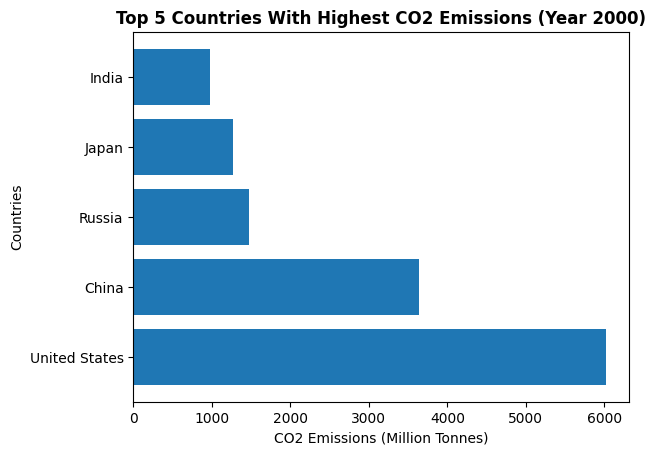

,country,co2
44201,United States,6016.351
8969,China,3644.464
35033,Russia,1478.185
21736,Japan,1264.595
20116,India,978.104


In [6]:
plt.barh(set2000.country, set2000.co2)
plt.title('Top 5 Countries With Highest CO2 Emissions (Year 2000)', fontweight = 'bold')
plt.xlabel('CO2 Emissions (Million Tonnes)')
plt.ylabel('Countries')
plt.show()

set2000[['country', 'co2']]

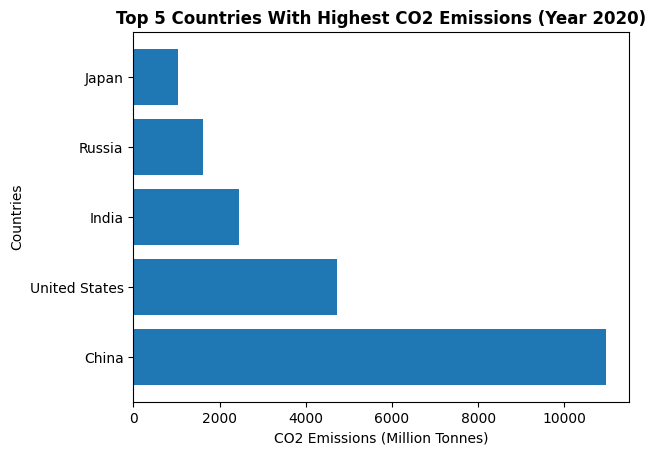

,country,co2
8989,China,10956.213
44221,United States,4715.691
20136,India,2445.012
35053,Russia,1624.221
21756,Japan,1042.224


In [7]:
plt.barh(set2020.country, set2020.co2)
plt.title('Top 5 Countries With Highest CO2 Emissions (Year 2020)', fontweight = 'bold')
plt.xlabel('CO2 Emissions (Million Tonnes)')
plt.ylabel('Countries')
plt.show()

set2020[['country', 'co2']]

As observed in the resulting charts, the top 5 countries with the highest CO2 emissions remain the same in both years. These are: United States, China, Russia, Japan and India. The most evident change during this time period is regarding China's emissions, which went from 3,644.4 million tonnes in the year 2000 to 10,956.2 million tonnes 20 years later, taking the lead with an approximate 200% increase in CO2 emissions. 

Another relevant point of analysis to consider - as briefly mentioned in the introduction - is the **correlation between population and CO2 emissions in 2020**, as well as the **correlation between GDP and CO2 emissions in 2018** (across all countries). To get a visual idea of these correlations, it's only a matter of plotting the data points for each case. 

NOTE: The data for GDP was taken from 2018, since it is the latest year within the imported dataset that registers values for GDP, at the moment. 

In [8]:
population = df2[['population', 'co2']].loc[year2020] # DataFrame including only population and CO2 in 2020

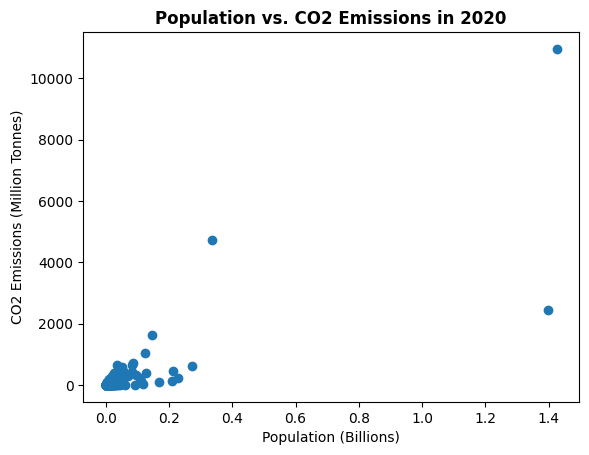

In [9]:
plt.scatter(population.population/1000000000, population.co2)
plt.title('Population vs. CO2 Emissions in 2020', fontweight = 'bold')
plt.xlabel('Population (Billions)')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.show()

In [10]:
year2018 = (df2['year'] == 2018) #Filter for the year 2018
gdp = df2[['gdp', 'co2']].loc[year2018] # DataFrame including only GDP and CO2 in 2018

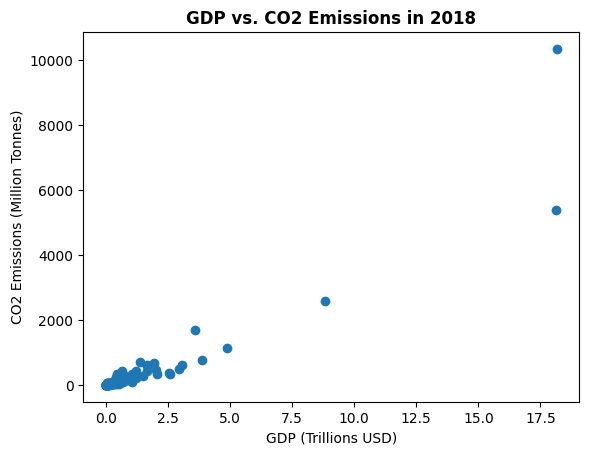

In [11]:
plt.scatter(gdp.gdp/1000000000000, gdp.co2)
plt.title('GDP vs. CO2 Emissions in 2018', fontweight = 'bold')
plt.xlabel('GDP (Trillions USD)')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.show()

The resulting graphs reflect a positive correlation with CO2 emission in both cases: population and GDP, as shown by the incremental values of CO2 emissions when both population and GDP increase as well. For a more precise analysis, it's possible to calculate the correlation coefficient for both cases, by using the following function:

In [12]:
population.corr()

,population,co2
population,1.000000,0.814582
co2,0.814582,1.000000


In [13]:
gdp.corr()

,gdp,co2
gdp,1.000000,0.936389
co2,0.936389,1.000000


The correlation coefficient (r) between population and CO2 emissions (in 2020) is 0.81, while the coefficient between GDP and CO2 emissions (in 2018) is 0.93, indicating that there's a strong relationship between changes of both population and GDP, and changes in CO2 emissions. However, by taking just these two figures into account, the impact from GDP is considerably larger when it comes to changes in CO2 emissions. 

Additionally, the last point of interest for this analysis will be to take a closer look at the behavior of the **top 2 countries with the highest CO2 emissions in 2020: China and the United States**, particularly regarding the relationship between population, GDP and CO2 emissions, similar to the previous examination. For this, a new Data Frame will be created for each country, in order to isolate the respective population, GDP and CO2 for each year since the year 2000:

In [14]:
chinafilt = (df['country'] == 'China') & (df['year'] >= 2000) & (df['year'] <= 2020) # Filter for China
china = df2[['year', 'population', 'gdp', 'co2']].loc[chinafilt] # DataFrame for China's data

usafilt = (df['country'] == 'United States') & (df['year'] >= 2000) & (df['year'] <= 2020) # Filter for U.S.
usa = df2[['year', 'population', 'gdp', 'co2']].loc[usafilt] # DataFrame for United States' data

With the resulting Data Frames, it's much easier to generate a visualization that exhibits the behavior of CO2 emissions from 2000 to 2020 for each country:

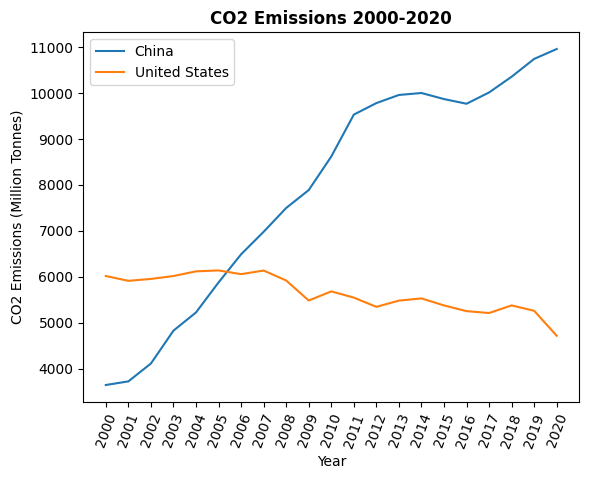

In [15]:
plt.plot(china.year.astype(str), china.co2)
plt.plot(usa.year.astype(str), usa.co2)
plt.xticks(rotation = 70)
plt.title('CO2 Emissions 2000-2020', fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.legend(['China', 'United States'])
plt.show()

As observed, the United States' CO2 emissions have progressively dropped throughout the 20 years that are being considered, while China's emissions have increased at a steep rate during this timeframe, surpassing the United States between 2005 and 2006, and reaching levels never seen before for the Asian country.

Furthermore, to explore the **correlation between population and CO2 emissions**, as well as the **correlation between GDP and CO2 emissions** for both countries, it's relevant to examine the change of these factors year after year, for which a new column will be created to calculate de percentage change for population, GDP, and CO2 within each Data Frame:

In [16]:
china['pop_change'] = china['population'].pct_change()
china['gdp_change'] = china['gdp'].pct_change()
china['co2_change'] = china['co2'].pct_change()

usa['pop_change'] = usa['population'].pct_change()
usa['gdp_change'] = usa['gdp'].pct_change()
usa['co2_change'] = usa['co2'].pct_change()

With these new calculated columns, it's now possible to study the correlation between population and CO2 emissions for the U.S. and China by generating a visualization of the relationship between both percentage variations, and calculating the corresponding correlation coefficients:

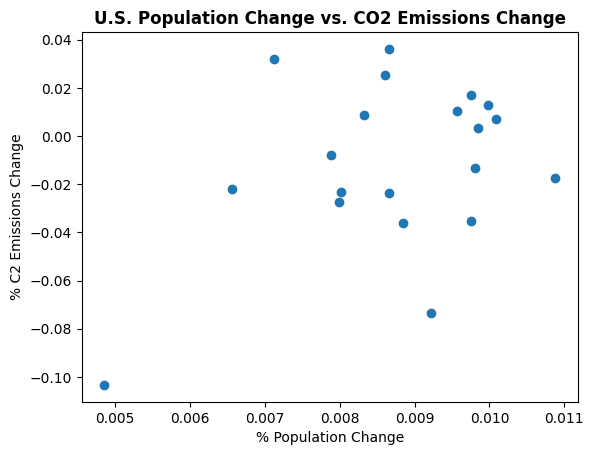

,pop_change,co2_change
pop_change,1.000000,0.388748
co2_change,0.388748,1.000000


In [17]:
plt.scatter(usa.pop_change, usa.co2_change)
plt.title('U.S. Population Change vs. CO2 Emissions Change', fontweight = 'bold')
plt.xlabel('% Population Change')
plt.ylabel('% C2 Emissions Change')
plt.show()

usa[['pop_change', 'co2_change']].corr() # Correlation coefficient between population and CO2

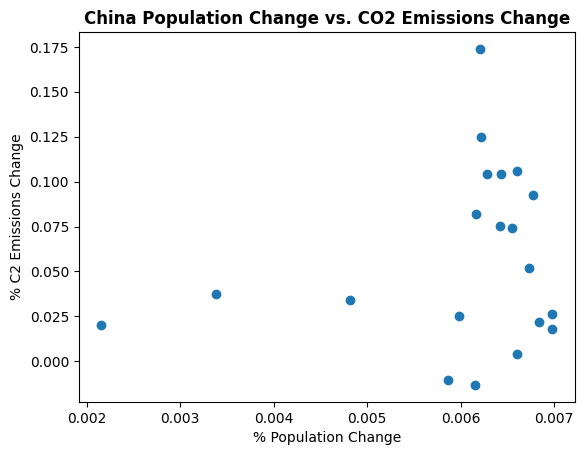

,pop_change,co2_change
pop_change,1.00000,0.20536
co2_change,0.20536,1.00000


In [18]:
plt.scatter(china.pop_change, china.co2_change)
plt.title('China Population Change vs. CO2 Emissions Change', fontweight = 'bold')
plt.xlabel('% Population Change')
plt.ylabel('% C2 Emissions Change')
plt.show()

china[['pop_change', 'co2_change']].corr() # Correlation coefficient between population and CO2

The generated scatter plots indicate a positive relationship between population and CO2 emissions. However, the data points are considerably dispersed for both the U.S. and China, which suggests a not so strong correlation between these two variables. The calculated correlation coefficients are 0.38 and 0.20 for the U.S. and China respectively, which supports the statement that the correlation between population and CO2 emissions is rather weak.

The same set of steps will be implemented to determine the correlation between GDP and CO2 emissions, but only considering data up to 2018, due to previously stated reasons:

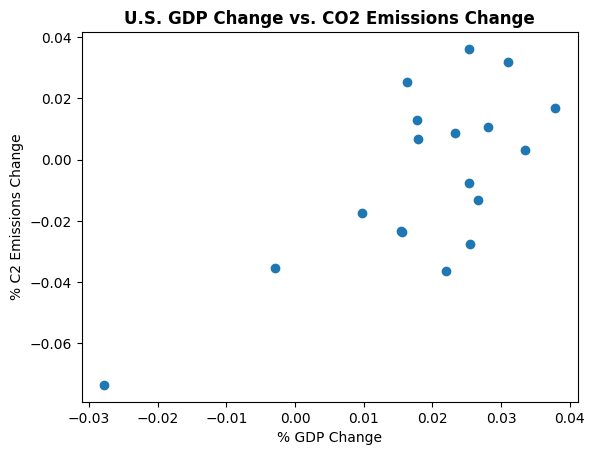

,gdp_change,co2_change
gdp_change,1.000000,0.705134
co2_change,0.705134,1.000000


In [19]:
plt.scatter(usa[usa['year'] <= 2018].gdp_change, usa[usa['year'] <= 2018].co2_change)
plt.title('U.S. GDP Change vs. CO2 Emissions Change', fontweight = 'bold')
plt.xlabel('% GDP Change')
plt.ylabel('% C2 Emissions Change')
plt.show()

usa[['gdp_change', 'co2_change']].corr() # Correlation coefficient between GDP and CO2

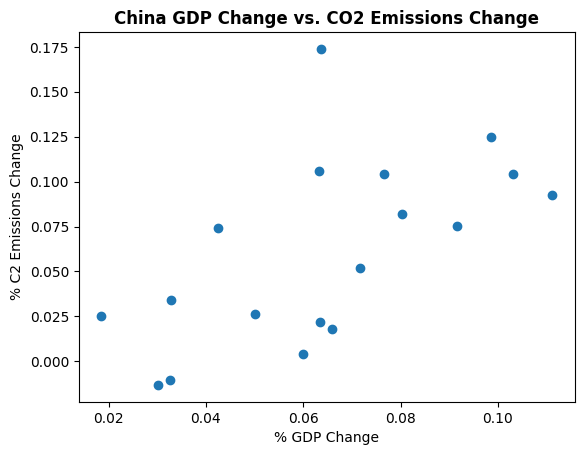

,gdp_change,co2_change
gdp_change,1.000000,0.590995
co2_change,0.590995,1.000000


In [20]:
plt.scatter(china[china['year'] <= 2018].gdp_change, china[china['year'] <= 2018].co2_change)
plt.title('China GDP Change vs. CO2 Emissions Change', fontweight = 'bold')
plt.xlabel('% GDP Change')
plt.ylabel('% C2 Emissions Change')
plt.show()

china[['gdp_change', 'co2_change']].corr() # Correlation coefficient between GDP and CO2

The resulting scatter plots reflect a much clearer, positive relationship between GDP and CO2 emissions in both countries, which is backed up by the calculated correlation coefficients: 0.70 for the U.S. and 0.59 for China. 

## Conclusions



The conducted analysis' objective was to determine key aspects of global CO2 emissions and explore its behavior with respect to factors such as population and GDP. The greatest emitters of CO2 seem to remain relatively stable throughout recent years with a few shifts in the positions these emitters ocuppy, as in the case of China which has evidenced a dramatic increase in CO2 emissions. This could be attributed to many causes, but likely follows from Asia's considerable growth in industry and commerce during the 21st century. Moreover, while both population and GDP have presented a strong, positive correlation with changes in CO2 emissions, it seems like GDP has a larger influence in determining the magnitud of such emissions. This becomes more evident when looking at specific countries like the U.S. and China, where population has a relatively weaker impact on the yearly emissions they contribute globally. However, to carry out a more accurate analysis in terms of population, it might be relevant to consider CO2 emissions per capita, which determines de average emission per citizen within a nation, instead of the population as a whole. 